In [1]:
import numpy as np
rng = np.random.default_rng(seed=1701)

def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output
        
values = rng.integers(1, 10, size=5)
compute_reciprocals(values)

array([0.11111111, 0.25      , 1.        , 0.33333333, 0.125     ])

In [2]:
big_array = rng.integers(1, 100, size=1000000)
%timeit compute_reciprocals(big_array)

4.39 s ± 378 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


- default_rng는 np.random이 전역적인 난수 생성기라는 약점을 극복하고 지역적인 난수를 생성해준다고 한다.
- 이는 하나의 시드에서 두 샘플을 테스트할때 두 샘플의 독립성을 유지하거나 하는 등의 일에 유리한 이점이 있다.
- 대충 더 좋은 난수 생성기라 생각하면 된다.
- 또한 %로 시작하는 명령어는 매직 명령어인데, ipython 이나 jupyter 전용 명령어라 한다. 부가기능을 제공하는 명령어들이다.
- 코드의 내용은 values를 인자로 받아서 for 루프를 돌려 역수들을 output에 저장해 반환하는 함수를 만들고, rng로 랜덤한 값들에 적용해보는 내용인데, 1~100 사이의 랜덤한 정수를 100만개 뽑아서 values로 주면 4.39초 플마 378미리초 표준편차 걸린다는 내용이다(컴퓨터 성능마다 다름 지금 환경이 내 낡은 노트북이라 더욱 느리게 나온듯 하다.)
- 루프당 4.39초는 for문이 반복하는 각각의 루프가 아니라 전체를 말하는 것이다.
- 100만개에 5초 미만이면 별로 안느린것 같은데 사실은 엄청 느린거라한다. 그리고 그마저도 작업 자체가 아니라 동적 타입에 대한 검사 등에 의해 주로 느려진다한다.

In [3]:
%timeit (1.0 / big_array)

1.7 ms ± 49.5 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


- 위는 같은 big_array에 대한 연산이지만 1.7 밀리세컨드에 표준편차 49.5 마이크로세컨드다
- 벡터화된 연산이라고 루프를 돌리지 않고 그냥 긴 벡터에 바로 나눠주는거다. c로 구현했다고 한다. 빠르다.
- 일반 파이썬 연산 하듯 / 하나로 간단하게 연산가능하다.
- 두 벡터를 componentwise하게 나눠줄수도 있다.

In [6]:
x = np.arange(4)
print("x      =", x)
print("x + 5  =", x + 5)
print("x - 5  =", x - 5)
print("x * 2  =", x * 2)
print("x / 2  =", x / 2)
print("x // 2 =", x // 2)
print("-x     = ", -x)
print("x ** 2 = ", x ** 2)
print("x % 2  = ", x % 2)
# 기본 산술연산자를 다 지원한다.

x      = [0 1 2 3]
x + 5  = [5 6 7 8]
x - 5  = [-5 -4 -3 -2]
x * 2  = [0 2 4 6]
x / 2  = [0.  0.5 1.  1.5]
x // 2 = [0 0 1 1]
-x     =  [ 0 -1 -2 -3]
x ** 2 =  [0 1 4 9]
x % 2  =  [0 1 0 1]


### 이렇게 함수 확장시킨 것을 wrapper 함수라고 부른다.
- 절댓값 지수함수 삼각함수도 지원한다.
- 그리고 정밀도 개선한 버전도 있다. 근데 이런거 자잘한거 다 써보고 외우는거보다 필요할때 그때그때 찾아 쓰는게 더 실용적인 태도라고 생각한다. 그런게 있더라 정도만 기억해두면 된다고 본다. egoing님 피셜이다. 나도 그분의 의견에 전적으로 동의한다. 지엽적인 부분에 시간과 자원을 매몰할 이유가 없다. 큰 그림을 그려나가고 효율적으로 학습하는게 좋다고 생각한다.
- 무엇보다 어차피 다 못외운다. 최소한 나는

### 이하는 고급 기능이다.

In [7]:
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 10, out=y)
print(y)

[ 0. 10. 20. 30. 40.]


- 사이즈가 맞는 배열을 out 매개변수의 인자로 지정해주면 연산결과를 거기다 저장한다. 기존의 y는 덮어써진다.

In [8]:
y = np.zeros(10)
np.power(2, x, out=y[::2])
print(y)

[ 1.  0.  2.  0.  4.  0.  8.  0. 16.  0.]


- 사이즈가 꼭 그대로 일치해야하는건 아니고, 이렇게 두칸 간격으로 저장시킬 수도 있다.
- [:::]의 각 칸은 range(,,)의 각 칸과 유사하게 어디에서 시작해서 어디에서 끝내며 어느 간격으로 띄울지를 정한다.

In [11]:
x = np.arange(1, 6)
print(np.add.reduce(x))

15


# 이항 ufunc의 경우 .reduce를 통해 배열의 각 원소를 모두 연산해서 스칼라로 만들어버릴 수 있다.
- 더하기나 곱하기야 별 문제 없겠으나, 빼기나 나누기처럼 교환법칙이 성립하지 않는 경우는 어떠할까?

In [12]:
x = np.array([100, 5, 2])
print(np.divide.reduce(x))

10.0


### 아마도 첫번째거 빼곤 다 역원을 더하거나 곱하는 식으로 가나 보다.
- 이를 확인하기 위해 중간과정을 모두 기록해주는 accumulate를 사용해보자

In [14]:
x = np.array([100, 5, 2])
print(np.divide.accumulate(x))

[100.  20.  10.]


# 5를 나누고 나서 2를 나누는 작업이 맞나보다.

In [15]:
x = np.arange(1, 6)
np.multiply.outer(x, x)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

# outter를 주면 두 배열의 카티지언곱 비슷한걸 수행하고 그 각각의 순서쌍을 연산하는 작업같은걸 한다. 이것을 outter product라 하는가보다. 처음 본다.

# 일단 func까지만 하고 나머지는 내일 하겠다. 미안하다. 목요일까지 미분방정식 시험있었고 금토일에 가정사로 본가를 갔다. 3000원 나간게 슬프다. 시험기간엔 쉬길래 좀 늦게 내도 되는줄 알았다.
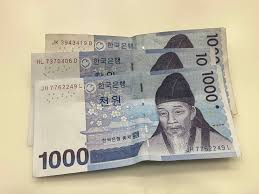